# **Exploratory Data Analysis**
### **Team 302**
**Team Members:** Ajay Mahendra Surve, Chitvan Nagaich, Maurya Sasanka Bhima, Prakriti Sharma, Sreeya Guha

## **Executive Summary:**
This project utilizes Yelp's database to research and aid food businesses in Arizona by identifying key customer trends and providing actionable insights. By focusing on local restaurants, we aim to enhance business efficiency and consumer satisfaction through the use of analytical data. Our research analyzes customer reviews, ratings, and interaction patterns to identify factors contributing to high consumer satisfaction. Using Python-based analytical methods, we will dig deep into insightful data to empower restaurants to optimize their businesses and assist customers in making informed eating choices. By applying predictive modeling, text summarization, and sentiment analysis, we will bridge the knowledge gap between consumers and businesses and forge a more data-oriented food business landscape in Arizona.

## **Data Sources:**
- List the data sources
- Provide the filtering/selection criteria you applied to the Yelp data.
- Provide the descriptions and links of the external data sources

In [1]:
!pip install seaborn

In [5]:
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
business_df = pd.read_csv('business_az_final.csv')
print(business_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1639 non-null   int64  
 1   business_id   1639 non-null   object 
 2   name          1639 non-null   object 
 3   address       1605 non-null   object 
 4   city          1639 non-null   object 
 5   state         1639 non-null   object 
 6   postal_code   1638 non-null   float64
 7   latitude      1639 non-null   float64
 8   longitude     1639 non-null   float64
 9   stars         1639 non-null   float64
 10  review_count  1639 non-null   int64  
 11  is_open       1639 non-null   int64  
 12  attributes    1606 non-null   object 
 13  categories    1639 non-null   object 
 14  hours         1476 non-null   object 
dtypes: float64(4), int64(3), object(8)
memory usage: 192.2+ KB
None


In [12]:
business_df.head(10)

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,126,anLQj9AM8vjbcLSIE0iUgg,Papa Murphy's,"7250 North La Cholla, Suite 186",Tucson,AZ,85741.0,32.338572,-111.010760,4.0,22,1,"{'OutdoorSeating': 'False', 'Alcohol': ""u'none...","Pizza, Restaurants",NaN
1,132,9C2rpb56aQvW0ViZHK9sPw,Home Plate Sports Pub,4880 E 22nd St,Tucson,AZ,85711.0,32.206315,-110.887843,3.5,56,1,"{'RestaurantsGoodForGroups': 'True', 'Alcohol'...","Bars, Restaurants, Sports Bars, Nightlife","{'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ..."
2,234,Y6heWJJ9AmEL58fZwgi9YQ,Rosati's Pizza,2944 W Ina Rd,Tucson,AZ,85741.0,32.338724,-111.030310,4.0,58,1,"{'RestaurantsDelivery': 'True', 'RestaurantsTa...","Sports Bars, Bars, Nightlife, Italian, Restaur...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-0:0', ..."
3,319,f82dhKNiUXsDVPMLqKYiIQ,Sher-e-Punjab,853 East Grant Rd,Tucson,AZ,85719.0,32.250960,-110.959158,4.0,446,1,"{'RestaurantsAttire': ""'casual'"", 'BusinessAcc...","Restaurants, Salad, Pakistani, Indian, Cocktai...","{'Tuesday': '16:0-21:0', 'Wednesday': '16:0-21..."
4,457,D7z_V6E8cxXghSRcHAmUPg,La Bella China Restaurant,5680 S 12th Ave,Tucson,AZ,85706.0,32.149473,-110.978186,4.0,92,1,"{'GoodForKids': 'True', 'BusinessAcceptsCredit...","Restaurants, Chinese","{'Tuesday': '11:0-19:30', 'Wednesday': '11:0-1..."
5,553,adATTqggIQX5xxLDISkFTw,Just Churros,NaN,Tucson,AZ,85705.0,32.271231,-110.992075,5.0,25,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Food Trucks, Restaurants, Caterers, Event Plan...","{'Monday': '0:0-0:0', 'Friday': '15:0-21:0', '..."
6,954,2vAqYNN86VWXZiy2E96-TQ,Chick-fil-A,"1303 E University Blvd, Ste 149",Tucson,AZ,85719.0,32.232445,-110.951699,3.0,13,1,"{'RestaurantsReservations': 'False', 'GoodForK...","Event Planning & Services, Caterers, Fast Food...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-17:0', ..."
7,968,3swM60bulnut1d4AZti80Q,Rockabilly Grill,3700 N Oracle Rd,Tucson,AZ,85705.0,32.273989,-110.977534,3.5,37,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...","Nightlife, American (New), Music Venues, Resta...","{'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ..."
8,995,iNMdSi5bmvGSGeRQiUW4dw,Wendy's,3535 E. Irvington Road,Tucson,AZ,85714.0,32.163740,-110.916722,2.5,14,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Fast Food, Burgers, Restaurants","{'Monday': '10:0-23:0', 'Tuesday': '10:0-23:0'..."
9,1060,oQYZ3j2H758y07p4RpCWug,August Rhodes Bakery,3073 N Campbell Ave,Tucson,AZ,85719.0,32.262719,-110.944630,4.5,89,1,"{'HasTV': 'False', 'WiFi': ""u'free'"", 'Ambienc...","Event Planning & Services, Food, Sandwiches, B...","{'Monday': '0:0-0:0', 'Thursday': '9:0-12:0', ..."


In [9]:
reviews_df = pd.read_csv('restaurant_reviews_az (2).csv')
print(reviews_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48147 entries, 0 to 48146
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    48147 non-null  object
 1   user_id      48147 non-null  object
 2   business_id  48147 non-null  object
 3   stars        48147 non-null  int64 
 4   useful       48147 non-null  int64 
 5   funny        48147 non-null  int64 
 6   cool         48147 non-null  int64 
 7   text         48147 non-null  object
 8   date         48147 non-null  object
dtypes: int64(4), object(5)
memory usage: 3.3+ MB
None


In [6]:
reviews_df.head(10)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,IVS7do_HBzroiCiymNdxDg,fdFgZQQYQJeEAshH4lxSfQ,sGy67CpJctjeCWClWqonjA,3,1,1,0,"OK, the hype about having Hatch chili in your ...",2020-01-27 22:59:06
1,QP2pSzSqpJTMWOCuUuyXkQ,JBLWSXBTKFvJYYiM-FnCOQ,3w7NRntdQ9h0KwDsksIt5Q,5,1,1,1,Pandemic pit stop to have an ice cream.... onl...,2020-04-19 05:33:16
2,oK0cGYStgDOusZKz9B1qug,2_9fKnXChUjC5xArfF8BLg,OMnPtRGmbY8qH_wIILfYKA,5,1,0,0,I was lucky enough to go to the soft opening a...,2020-02-29 19:43:44
3,E_ABvFCNVLbfOgRg3Pv1KQ,9MExTQ76GSKhxSWnTS901g,V9XlikTxq0My4gE8LULsjw,5,0,0,0,I've gone to claim Jumpers all over the US and...,2020-03-14 21:47:07
4,Rd222CrrnXkXukR2iWj69g,LPxuausjvDN88uPr-Q4cQA,CA5BOxKRDPGJgdUQ8OUOpw,4,1,0,0,"If you haven't been to Maynard's kitchen, it'...",2020-01-17 20:32:57
5,kx6O_lyLzUnA7Xip5wh2NA,YsINprB2G1DM8qG1hbrPUg,rViAhfKLKmwbhTKROM9m0w,1,0,0,0,I stay at the Main Hotel at the Casino from Ju...,2020-07-14 16:43:23
6,DblKoOM1O6Bug_0b6YcpIQ,8o2iLbpduMiPefS2Gy_28g,wJmyu7W1K9A_gE8Ed4Bc9w,5,0,0,0,In town after a long weekend of hiking and cam...,2020-01-20 04:55:52
7,vW2w4F27XNIkD2toYu0PKg,t9LqNtCGuNUqBeFKWoFOPg,u4P6hqDz6-QG9PR2Pj5KIw,5,0,0,0,This is the definition of a great family-run b...,2020-01-16 04:58:57
8,efEnLMr5o18eS1dSQ3c_Rg,UsRPPZsw2DRqjkLqsE1pXw,SLreQZjicOqB_7MCfJ8MdQ,5,0,0,0,This was the best breakfast we had on our whol...,2020-01-03 15:02:07
9,5eSsbPALefuJagYOy7Uf3Q,w__3sxW-rIb5joqReLojGQ,8QJTzIaR5FceGds8HBSIig,2,1,0,0,I went here while awaiting a flight out of Tuc...,2020-01-03 21:18:21


In [21]:
missing_values = business_df.isnull().sum()
missing_percentage = (missing_values / len(business_df)) * 100
missing_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_summary)

              Missing Values  Percentage
Unnamed: 0                 0    0.000000
business_id                0    0.000000
name                       0    0.000000
address                   34    2.074436
city                       0    0.000000
state                      0    0.000000
postal_code                1    0.061013
latitude                   0    0.000000
longitude                  0    0.000000
stars                      0    0.000000
review_count               0    0.000000
is_open                    0    0.000000
attributes                33    2.013423
categories                 0    0.000000
hours                    163    9.945088


In [7]:
missing_values = reviews_df.isnull().sum()
missing_percentage = (missing_values / len(reviews_df)) * 100
missing_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_summary)

             Missing Values  Percentage
review_id                 0         0.0
user_id                   0         0.0
business_id               0         0.0
stars                     0         0.0
useful                    0         0.0
funny                     0         0.0
cool                      0         0.0
text                      0         0.0
date                      0         0.0


In [9]:
# Number of reviews
num_reviews = reviews_df.shape[0]

# Total number of tokens (word count across all reviews)
reviews_df["word_count"] = reviews_df["text"].apply(lambda x: len(str(x).split()))
total_tokens = reviews_df["word_count"].sum()

# Number of unique words (vocabulary size)
unique_words = set()
reviews_df["text"].str.split().apply(unique_words.update)
vocab_size = len(unique_words)

# Average review length
avg_review_length = reviews_df["word_count"].mean()

# Number of unique customers
num_unique_customers = reviews_df["user_id"].nunique()

# Number of businesses covered
num_businesses = reviews_df["business_id"].nunique()

# Average stars per review
avg_stars = reviews_df["stars"].mean()

# Average votes per review
avg_useful_votes = reviews_df["useful"].mean()
avg_funny_votes = reviews_df["funny"].mean()
avg_cool_votes = reviews_df["cool"].mean()

# Distribution of businesses by city
city_distribution = business_df["city"].value_counts()

# Distribution of star ratings
star_distribution = reviews_df["stars"].value_counts().sort_index()

# Display summary statistics
summary_stats = {
    "Total Number of Reviews": num_reviews,
    "Total Number of Tokens": total_tokens,
    "Vocabulary Size (Unique Words)": vocab_size,
    "Average Review Length": avg_review_length,
    "Number of Unique Customers": num_unique_customers,
    "Number of Businesses Covered": num_businesses,
    "Average Stars per Review": avg_stars,
    "Average Useful Votes per Review": avg_useful_votes,
    "Average Funny Votes per Review": avg_funny_votes,
    "Average Cool Votes per Review": avg_cool_votes,
}

In [10]:
summary_stats_df = pd.DataFrame(list(summary_stats.items()), columns=["Metric", "Value"])
print(summary_stats_df)

                            Metric         Value
0          Total Number of Reviews  4.814700e+04
1           Total Number of Tokens  4.185577e+06
2   Vocabulary Size (Unique Words)  1.194830e+05
3            Average Review Length  8.693329e+01
4       Number of Unique Customers  2.273000e+04
5     Number of Businesses Covered  1.880000e+03
6         Average Stars per Review  3.736702e+00
7  Average Useful Votes per Review  8.586828e-01
8   Average Funny Votes per Review  1.831059e-01
9    Average Cool Votes per Review  4.399028e-01


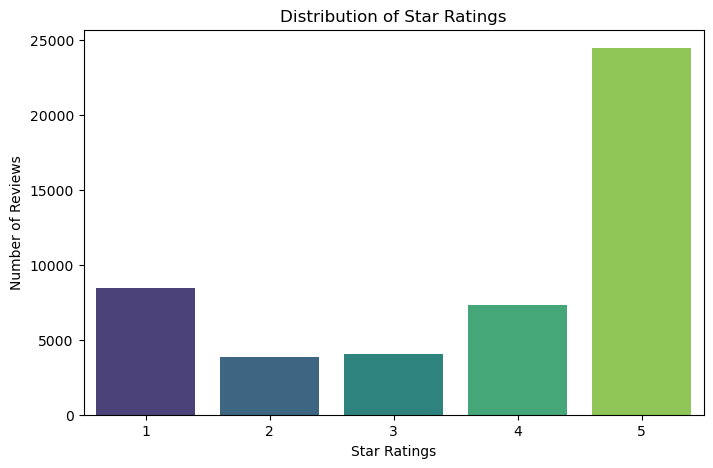

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(x=star_distribution.index, y=star_distribution.values, palette="viridis")
plt.xlabel("Star Ratings")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Star Ratings")
plt.show() 

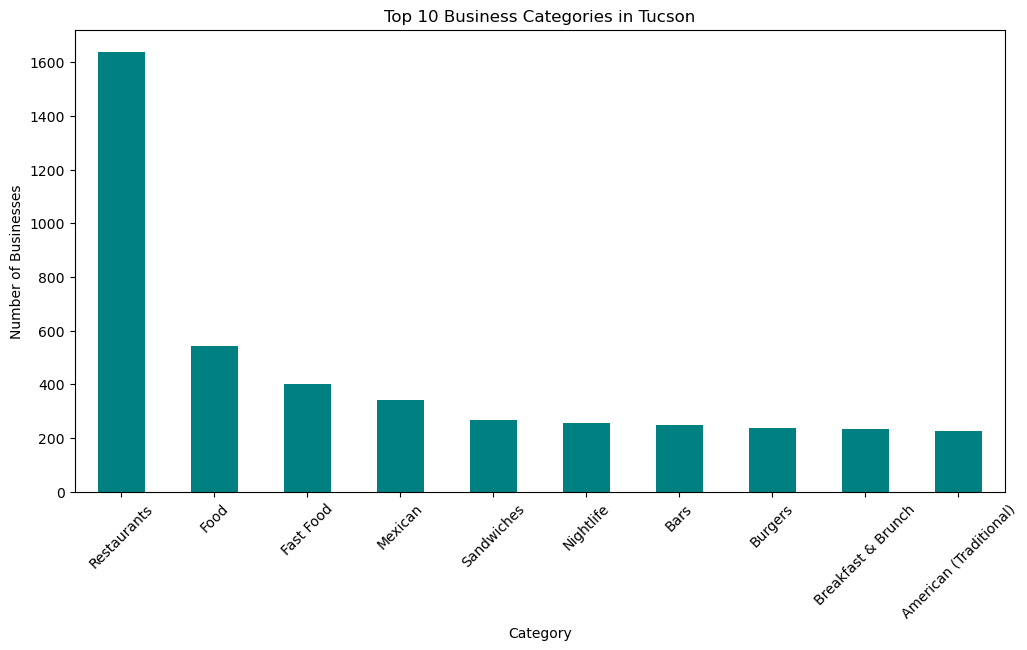

In [12]:
plt.figure(figsize=(12, 6))
category_counts = business_df["categories"].str.split(", ").explode().value_counts()
category_counts[:10].plot(kind="bar", color="teal")
plt.xlabel("Category")
plt.ylabel("Number of Businesses")
plt.title("Top 10 Business Categories in Tucson")
plt.xticks(rotation=45)
plt.show()

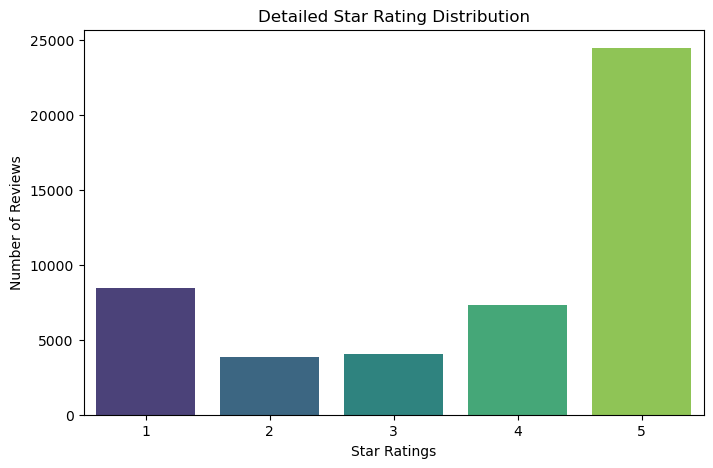

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x=reviews_df["stars"], palette="viridis")
plt.xlabel("Star Ratings")
plt.ylabel("Number of Reviews")
plt.title("Detailed Star Rating Distribution")
plt.show()

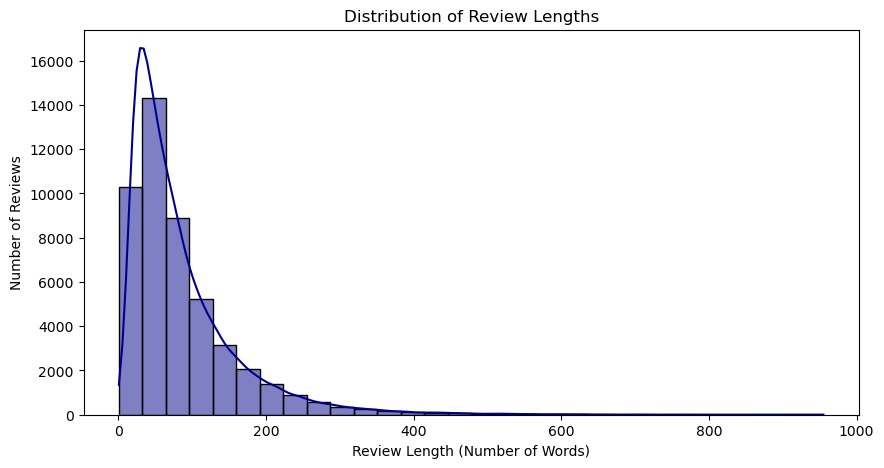

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(reviews_df["text"].apply(lambda x: len(str(x).split())), bins=30, kde=True, color="darkblue")
plt.xlabel("Review Length (Number of Words)")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Review Lengths")
plt.show()

### **Data Evaluation**

In [15]:
num_businesses = business_df.shape[0]
num_reviews = reviews_df.shape[0]
num_customers = reviews_df["user_id"].nunique()
num_cities = business_df["city"].nunique()
unique_categories = business_df["categories"].str.split(", ").explode().nunique()

suitability_report = f"""
Data Suitability Analysis:
- Number of Businesses: {num_businesses}
- Number of Reviews: {num_reviews}
- Number of Unique Customers: {num_customers}
- Number of Cities Covered: {num_cities}
- Number of Unique Business Categories: {unique_categories}

The dataset is suitable for analyzing restaurant performance and customer feedback.
However, with only {num_cities} city (Tucson), geographic diversity is limited.
"""


min_reviews_per_business = reviews_df["business_id"].value_counts().min()
max_reviews_per_business = reviews_df["business_id"].value_counts().max()
avg_reviews_per_business = reviews_df["business_id"].value_counts().mean()

sample_size_report = f"""
Sample Size Evaluation:
- Average Reviews per Business: {avg_reviews_per_business:.2f}
- Minimum Reviews per Business: {min_reviews_per_business}
- Maximum Reviews per Business: {max_reviews_per_business}

With {num_reviews} reviews, the dataset is large enough to analyze customer sentiment.
However, some businesses have very few reviews, which may lead to skewed insights.
"""


In [16]:
only_one_city = num_cities == 1
high_rating_bias = reviews_df["stars"].value_counts(normalize=True).get(5, 0) > 0.5  # More than 50% are 5-star
low_variety_bias = unique_categories < 10  # If few categories are represented

bias_report = f"""
Bias Analysis:
- Only one city in the dataset: {'Yes' if only_one_city else 'No'}
- More than 50% of reviews are 5-star (high rating bias): {'Yes' if high_rating_bias else 'No'}
- Less than 10 distinct restaurant categories (low variety bias): {'Yes' if low_variety_bias else 'No'}

Possible bias detected in location (only Tucson) and rating distribution.
This may impact generalizability to all Arizona restaurants.
"""


In [17]:
missing_values = business_df.isnull().sum().sum() + reviews_df.isnull().sum().sum()
text_processing_difficulty = reviews_df["text"].apply(lambda x: len(str(x).split())).max() > 500  # Long reviews

challenges_report = f"""
Data Processing Challenges:
- Total Missing Values: {missing_values}
- Contains very long reviews (>500 words) requiring NLP preprocessing: {'Yes' if text_processing_difficulty else 'No'}

Challenges include handling missing data and processing long review texts for NLP tasks.
"""

print(suitability_report)
print(sample_size_report)
print(bias_report)
print(challenges_report)


Data Suitability Analysis:
- Number of Businesses: 1639
- Number of Reviews: 48147
- Number of Unique Customers: 22730
- Number of Cities Covered: 1
- Number of Unique Business Categories: 270

The dataset is suitable for analyzing restaurant performance and customer feedback.
However, with only 1 city (Tucson), geographic diversity is limited.


Sample Size Evaluation:
- Average Reviews per Business: 25.61
- Minimum Reviews per Business: 1
- Maximum Reviews per Business: 346

With 48147 reviews, the dataset is large enough to analyze customer sentiment.
However, some businesses have very few reviews, which may lead to skewed insights.


Bias Analysis:
- Only one city in the dataset: Yes
- More than 50% of reviews are 5-star (high rating bias): Yes
- Less than 10 distinct restaurant categories (low variety bias): No

Possible bias detected in location (only Tucson) and rating distribution.
This may impact generalizability to all Arizona restaurants.


Data Processing Challenges:
- Tot

### **Preliminary Data Exploration**

In [11]:
!pip install wordcloud

In [12]:
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 5.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.9 MB/s eta 0:00:0000:010:01m
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [15]:
import nltk
nltk.download('punkt')        # Tokenizer for words & sentences
nltk.download('stopwords')    # Common stopwords
nltk.download('averaged_perceptron_tagger')  # Part-of-speech tagging
nltk.download('wordnet')      # Lemmatization support


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sreeyaguha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sreeyaguha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sreeyaguha/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sreeyaguha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import bigrams
from textblob import TextBlob

In [21]:
import nltk
nltk.download('punkt')        # Word & sentence tokenizer
nltk.download('stopwords')    # Common stopwords
nltk.download('all')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sreeyaguha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sreeyaguha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/sreeyaguha/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/sreeyaguha/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/sreeyaguha/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/sreeyaguha/nltk_data...
[nltk_data]    |   Pac

True

In [23]:
stop_words = set(stopwords.words("english"))
reviews_df["tokens"] = reviews_df["text"].apply(lambda x: [word.lower() for word in word_tokenize(str(x)) if word.isalnum() and word.lower() not in stop_words])

In [25]:
word_list = [word for sublist in reviews_df["tokens"] for word in sublist]
word_freq = Counter(word_list).most_common(20)

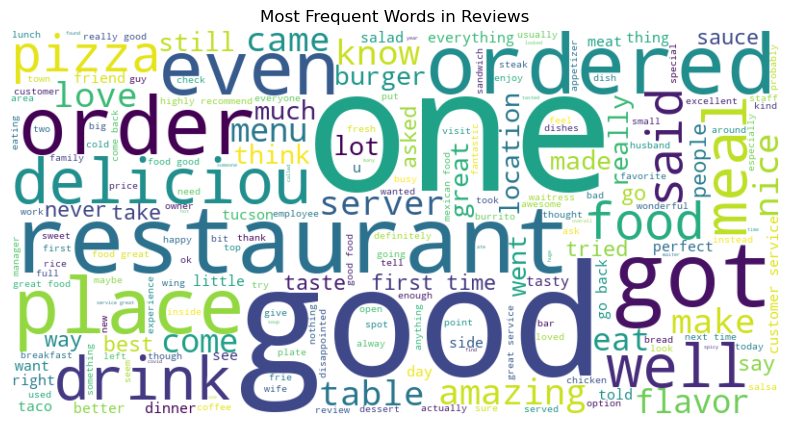

In [27]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(word_list))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Reviews")
plt.show()

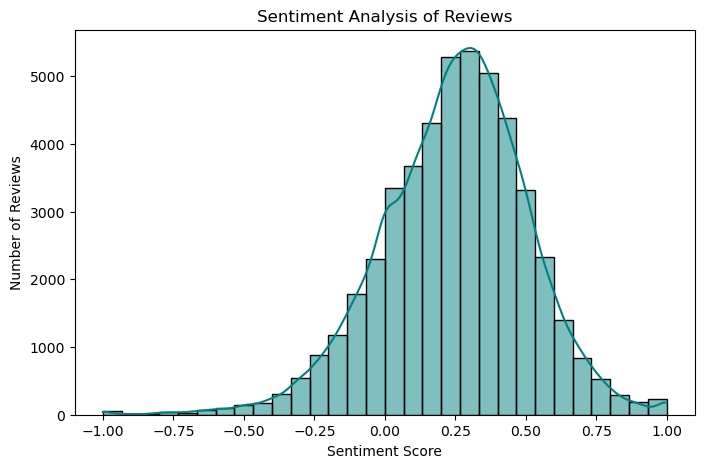

In [29]:
bigrams_list = list(bigrams(word_list))
bigram_freq = Counter(bigrams_list).most_common(10)
bigram_df = pd.DataFrame(bigram_freq, columns=["Bigram", "Frequency"])

reviews_df["polarity"] = reviews_df["text"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
avg_sentiment = reviews_df["polarity"].mean()

plt.figure(figsize=(8, 5))
sns.histplot(reviews_df["polarity"], bins=30, kde=True, color="teal")
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Reviews")
plt.title("Sentiment Analysis of Reviews")
plt.show()


In [33]:
print("\nTop 20 Most Frequent Words")
for word, freq in word_freq:
    print(f"{word}: {freq}")

print("\nTop 10 Bigrams (Common Two-Word Phrases)")
print(bigram_df)

print(f"\nOverall Sentiment Score:{avg_sentiment:.2f}")
print("Interpretation: Positive values indicate positive reviews, negative values indicate negative reviews.")


Top 20 Most Frequent Words
food: 34751
good: 22747
place: 19233
great: 18578
service: 16232
time: 14171
back: 13162
order: 13118
like: 12185
one: 11877
ordered: 11708
get: 11600
would: 11492
go: 10830
got: 10085
delicious: 10022
restaurant: 9242
really: 9029
us: 8987
also: 8955

Top 10 Bigrams (Common Two-Word Phrases)
                Bigram  Frequency
0        (first, time)       2429
1  (customer, service)       2064
2           (go, back)       1822
3  (highly, recommend)       1772
4         (food, good)       1641
5        (great, food)       1613
6       (really, good)       1578
7         (come, back)       1555
8        (food, great)       1397
9     (great, service)       1368

Overall Sentiment Score:0.25
Interpretation: Positive values indicate positive reviews, negative values indicate negative reviews.


## **Proposed Solution**

For our project, we’ll use deep learning-based sentiment analysis with LSTM and GRU to better classify reviews as positive, neutral, or negative compared to earlier methods. We’ll also apply predictive modeling with neural networks to understand what factors contribute to a restaurant’s success. To uncover common themes in customer feedback, we’ll use BERTopic for topic modeling, and for personalized recommendations, we’ll build a restaurant recommendation system using collaborative filtering and fine-tuned LLMs. These techniques align with our coursework and will provide useful insights for both restaurant owners and customers.